 CONFUSION MATRIX

         Class 1  Class 2  Class 3
Class 1     1395      449      256
Class 2      103     2967      281
Class 3       23      102     4424


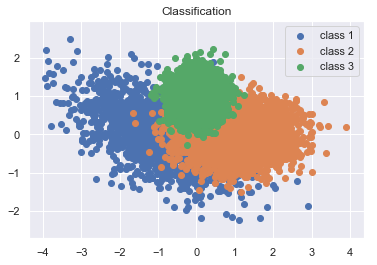

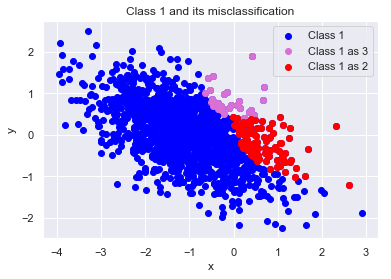

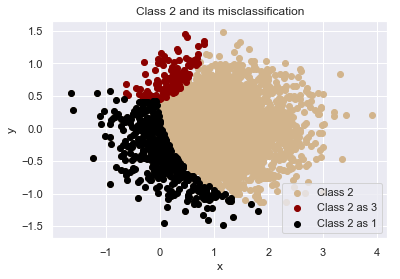

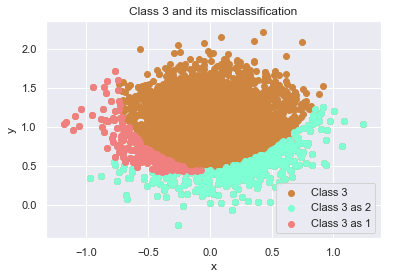

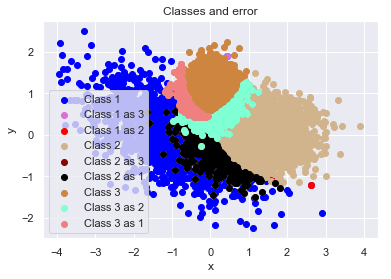

No. of Class 1 points misclassified= 126
No. of Class 2 points misclassified= 551
No. of Class 3 points misclassified= 537
No. of Class 1 points generated= 1521
No. of Class 2 points generated= 3093
No. of Class 3 points generated= 4550
Probability of error for class 1= 0.0126
Probability of error for class 2= 0.0551
Probability of error for class 3= 0.0537
Probability of error= 0.1214


In [56]:
import scipy.linalg as sl
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

def randgen(size, p):
    
    k1 = 0
    k2 = 0
    a = np.random.choice(3,size,p = [p[0],p[1],p[2]])
    for i in a:
        if i == 1:
            k1 = k1+1
        if i==2:
            k2=k2+1
    nsize = [size-k1-k2,k1,k2]
    return(nsize)

size=10000
p=[0.15,0.35,0.5]
n=randgen(size,p)

mean1=np.array([-1,0])
m1=mean1.reshape(2,1)
cov1=np.array([[1,-0.4],[-0.4,0.5]])
mean2=np.array([1,0])
m2=mean2.reshape(2,1)
cov2=np.array([[0.5,0],[0,0.2]])
mean3=np.array([0,1])
m3=mean3.reshape(2,1)
cov3=np.array([[0.1,0],[0,0.1]])

c1=sl.cholesky(cov1)
c2=sl.cholesky(cov2)
c3=sl.cholesky(cov3)
a1=np.random.normal(size=(n[0],cov1.shape[0]))
a2=np.random.normal(size=(n[1],cov2.shape[0]))
a3=np.random.normal(size=(n[2],cov3.shape[0]))
x1=(a1.dot(c1)+mean1).T
x2=(a2.dot(c2)+mean2).T
x3=(a3.dot(c3)+mean3).T

gx11=np.diag((-1/2)*(x1-m1).T@(np.linalg.inv(cov1))@(x1-m1))-(1/2)*np.linalg.det(cov1)+(1/2)*np.log(0.15)
gx12=np.diag((-1/2)*(x2-m1).T@(np.linalg.inv(cov1))@(x2-m1))-(1/2)*np.linalg.det(cov1)+(1/2)*np.log(0.35)
gx13=np.diag((-1/2)*(x3-m1).T@(np.linalg.inv(cov1))@(x3-m1))-(1/2)*np.linalg.det(cov1)+(1/2)*np.log(0.5)

gx21=np.diag((-1/2)*(x1-m2).T@(np.linalg.inv(cov2))@(x1-m2))-(1/2)*np.linalg.det(cov2)+(1/2)*np.log(0.15)
gx22=np.diag((-1/2)*(x2-m2).T@(np.linalg.inv(cov2))@(x2-m2))-(1/2)*np.linalg.det(cov2)+(1/2)*np.log(0.35)
gx23=np.diag((-1/2)*(x3-m2).T@(np.linalg.inv(cov2))@(x3-m2))-(1/2)*np.linalg.det(cov2)+(1/2)*np.log(0.5)

gx31=np.diag((-1/2)*(x1-m3).T@(np.linalg.inv(cov3))@(x1-m3))-(1/2)*np.linalg.det(cov3)+(1/2)*np.log(0.15)
gx32=np.diag((-1/2)*(x2-m3).T@(np.linalg.inv(cov3))@(x2-m3))-(1/2)*np.linalg.det(cov3)+(1/2)*np.log(0.35)
gx33=np.diag((-1/2)*(x3-m3).T@(np.linalg.inv(cov3))@(x3-m3))-(1/2)*np.linalg.det(cov3)+(1/2)*np.log(0.5)



c11=[]
c22=[]
c33=[]
v11a=[]
v11=[]
v22=[]
v22a=[]
v33=[]
v33a=[]
p11=(gx21-gx11)
p12=(gx31-gx11)

t1a=((gx11>gx21)&(gx11>gx31))
t1b=((gx21>gx11)&(gx21>gx31))
t1c=((gx31>gx21)&(gx31>gx11))
p21=(gx12-gx22)
p22=(gx32-gx22)
t2a=((gx12>gx22)&(gx12>gx32))
t2b=((gx22>gx12)&(gx22>gx32))
t2c=((gx32>gx22)&(gx32>gx12))

p31=(gx13-gx33)
p32=(gx23-gx33)
t3a=((gx13>gx23)&(gx13>gx33))
t3b=((gx23>gx13)&(gx23>gx33))
t3c=((gx33>gx23)&(gx33>gx13))


p11 = p11.reshape([p11.size])
p12 = p12.reshape([p12.size])
p21 = p21.reshape([p21.size])
p22 = p22.reshape([p22.size])
p31 = p31.reshape([p31.size])
p32 = p32.reshape([p32.size])
a=np.array([[t1a.sum(),t1b.sum(),t1c.sum()],[t2a.sum(),t2b.sum(),t2c.sum()],[t3a.sum(),t3b.sum(),t3c.sum()]])
ax = []
ay = []
ax11 = []
ay11 = []
ax11a=[]
ay11a=[]
ax22 = []
ay22 = []
ax22a = []
ay22a = []
ax33=[]
ay33=[]
ax33a=[]
ay33a=[]
for i in range(0,len(p11)):
    if p11[i]<0 and p12[i]<0: #g11>g21 g11>g31
        c11.append(i)  #class 1
    elif p11[i]>0 and p12[i]<0: #class 1 as 2
            v11a.append(i)
       
    else: 
        # class 1 as 3
        v11.append(i)

for i in range(0,len(p21)):
    if p21[i]<0 and p22[i]<0: 
        c22.append(i)  #class2
    elif p21[i]>0 and p22[i]<0: #class 2 as 1
            v22a.append(i)
    else: 
        v22.append(i)   # class 2 as 3
        
for i in range(0,len(p31)):
    if p31[i]<0 and p32[i]<0: 
        c33.append(i)  #class 3
    elif p31[i]>0 and p32[i]<0: #class 3 as 1
            v33a.append(i)
    else: 
        v33.append(i)   # class 3 as 2

    


G1=[t1a.sum(),t1b.sum(),t1c.sum()]
G2=[t2a.sum(),t2b.sum(),t2c.sum()]
G3=[t3a.sum(),t3b.sum(),t3c.sum()]
data = {'Class 1': G1, 'Class 2': G2,'Class 3':G3}
df = pd.DataFrame(data=data,index=['Class 1','Class 2','Class 3'])
print("\033[1;33;40m CONFUSION MATRIX\n")
print(df)
        

b11 = [x1[:,i] for i in v11] 
b11a= [x1[:,i] for i in v11a]
b22 = [x2[:,i] for i in v22] 
b22a= [x2[:,i] for i in v22a]
b33 = [x3[:,i] for i in v33] 
b33a= [x3[:,i] for i in v33a]

for i in b11:
    ax11.append(i[0])
    ay11.append(i[1])
for i in b11a:
    ax11a.append(i[0])
    ay11a.append(i[1])
for i in b22:
    ax22.append(i[0])
    ay22.append(i[1])
for i in b22a:
    ax22a.append(i[0])
    ay22a.append(i[1])
for i in b33:
    ax33.append(i[0])
    ay33.append(i[1])
for i in b33a:
    ax33a.append(i[0])
    ay33a.append(i[1])

plt.scatter(x1[0,:], x1[1,:],label='class 1')
plt.scatter(x2[0,:], x2[1,:],label='class 2')
plt.scatter(x3[0,:], x3[1,:],label='class 3')
plt.axis('equal')
plt.title('Classification')
plt.legend()
plt.show()
    
plt.scatter(x1[0,:], x1[1,:], color = "blue",label='Class 1')
plt.scatter(ax11,ay11,color="orchid",label='Class 1 as 3')
plt.scatter(ax11a,ay11a,color="red", label='Class 1 as 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Class 1 and its misclassification')
plt.legend()
plt.show()


plt.scatter(x2[0,:], x2[1,:],color="tan",label='Class 2')
plt.scatter(ax22,ay22,color="darkred",label='Class 2 as 3')
plt.scatter(ax22a,ay22a,color='black', label='Class 2 as 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Class 2 and its misclassification')
plt.legend()
plt.show()

plt.scatter(x3[0,:], x3[1,:],color="peru",label='Class 3')
plt.scatter(ax33,ay33,color="aquamarine",label='Class 3 as 2')
plt.scatter(ax33a,ay33a,color='lightcoral', label='Class 3 as 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Class 3 and its misclassification')
plt.legend()
plt.show()

plt.scatter(x1[0,:], x1[1,:], color = "blue",label='Class 1')
plt.scatter(ax11,ay11,color="orchid",label='Class 1 as 3')
plt.scatter(ax11a,ay11a,color="red", label='Class 1 as 2')

plt.scatter(x2[0,:], x2[1,:],color="tan",label='Class 2')
plt.scatter(ax22,ay22,color="darkred",label='Class 2 as 3')
plt.scatter(ax22a,ay22a,color='black', label='Class 2 as 1')


plt.scatter(x3[0,:], x3[1,:],color="peru",label='Class 3')
plt.scatter(ax33,ay33,color="aquamarine",label='Class 3 as 2')
plt.scatter(ax33a,ay33a,color='lightcoral', label='Class 3 as 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Classes and error')
plt.legend()
plt.show()

mc1=len(v11a)+len(v11)
mc2=len(v22a)+len(v22)
mc3=len(v33a)+len(v33)
print("No. of Class 1 points misclassified=",mc1)
print("No. of Class 2 points misclassified=",mc2)
print("No. of Class 3 points misclassified=",mc3)
print("No. of Class 1 points generated=",mc1+len(c11))
print("No. of Class 2 points generated=",mc1+len(c22))
print("No. of Class 3 points generated=",mc1+len(c33))

print("Probability of error for class 1=",(len(b11)+len(b11a))/10000)
print("Probability of error for class 2=",(len(b22)+len(b22a))/10000)
print("Probability of error for class 3=",(len(b33)+len(b33a))/10000)

print("Probability of error=",(mc1+mc2+mc3)/10000)

